In [23]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from scipy.stats import gamma

nucleotides = ['T', 'C', 'A', 'G']

def transition_probability(n1, n2, theta):
    if n1 == n2:
        prob = np.log(1/4 + 3/4 * np.exp(-4/3 * theta))
    else:
        prob = np.log(1/4 * (1 - np.exp(-4/3 * theta)))
    return prob

class TreeTopology:
    def __init__(self, tips, hidden, edges):
        self.tips = tips
        self.hidden = hidden
        self.edges = edges

    def calc_single_nucleotide(self, tips, thetas):
        all_combinations = product(nucleotides, repeat=self.hidden)
        max_log_prob = float('-inf')

        for combination in all_combinations:
            total_states = tips + list(combination)
            log_prob_sum = 0
            for edge, theta in zip(self.edges, thetas):
                n1 = total_states[edge[0]]
                n2 = total_states[edge[1]]
                log_prob_sum += transition_probability(n1, n2, theta)
            if log_prob_sum > max_log_prob:
                max_log_prob = log_prob_sum

        return max_log_prob
    
    def calc_probability(self, D, thetas):
        total_log_prob = 0
        for i in range(len(D[0])):
            tips = [row[i] for row in D]
            log_prob = self.calc_single_nucleotide(tips, thetas)
            total_log_prob += log_prob
        return total_log_prob

In [26]:
#Example 1

data = [['T', 'C', 'A'],
        ['T', 'C', 'A'],
        ['T', 'C', 'C']]
thetas = [0.001, 0.001, 0.001]

tree_topology = TreeTopology(tips=3, hidden=1, edges=[(0,3), (1,3), (2,3)])
tree_topology.calc_probability(data, thetas)

-8.015032826613208

-25.66967556224506


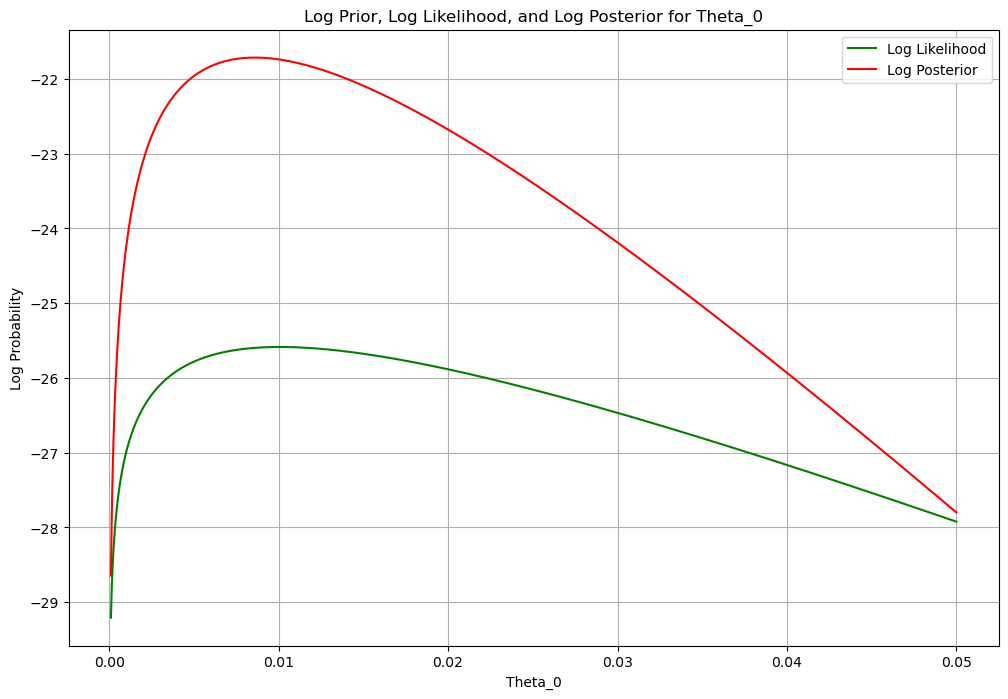

In [43]:
# Example 2

nucleotides = ['T', 'C', 'A', 'G']
initial_sequence = np.random.choice(nucleotides, size=100)

thetas = 0.015 + 0.001 * np.random.randn(100)

def generate_sequence(initial, thetas):
    new_sequence = []
    for i, nucleotide in enumerate(initial):
        if np.random.rand() < np.exp(-4/3 * thetas[i]):
            new_sequence.append(nucleotide)
        else:
            new_nucleotides = [n for n in nucleotides if n != nucleotide]
            new_sequence.append(np.random.choice(new_nucleotides))
    return new_sequence

sequence_1 = generate_sequence(initial_sequence, thetas)
sequence_2 = generate_sequence(initial_sequence, thetas)
sequence_3 = generate_sequence(initial_sequence, thetas)

tips = [sequence_1, sequence_2, sequence_3]

tree_topology = TreeTopology(tips=3, hidden=1, edges=[(0,3), (1,3), (2,3)])
tips_sequences = [''.join(seq) for seq in tips]
print(tree_topology.calc_probability(tips_sequences, thetas))

#Plot posterior density wrt theta_0
mean = 0.015
alpha = 2
beta = alpha / mean

theta_0_range = np.linspace(0.0001, 0.05, 1000)
log_prior = gamma.logpdf(theta_0_range, a=alpha, scale=1/beta)
log_likelihood = []
for theta_0 in theta_0_range:
    thetas_updated = np.copy(thetas)
    thetas_updated[0] = theta_0

    log_model_prob = tree_topology.calc_probability(tips_sequences, thetas_updated)
    log_likelihood.append(log_model_prob)

log_likelihood = np.array(log_likelihood)
log_posterior = log_likelihood + log_prior
plt.figure(figsize=(12, 8))
#plt.plot(theta_0_range, log_prior, label='Log Prior', color='blue')
plt.plot(theta_0_range, log_likelihood, label='Log Likelihood', color='green')
plt.plot(theta_0_range, log_posterior, label='Log Posterior', color='red')
plt.xlabel('Theta_0')
plt.ylabel('Log Probability')
plt.title('Log Prior, Log Likelihood, and Log Posterior for Theta_0')
plt.legend()
plt.grid(True)
plt.show()